Notebook to plot the group-level activation for both contrasts (Look Negative vs Look Neutral and Regulate Negative vs Look Negative). We also computed the clusters features (number of voxels and position of the maximum peak) emerging from these (thresholded) maps.

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from os.path import join as opj
from nilearn import plotting
from nilearn.image import load_img
import os
from pathlib import Path
from nilearn.regions import connected_regions
from nilearn.plotting import surf_plotting
from nilearn import datasets, image
from nilearn.image import coord_transform

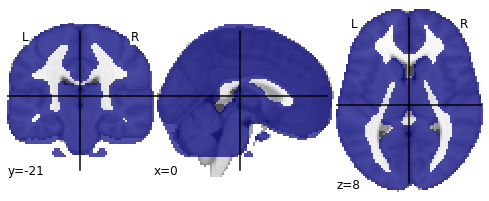

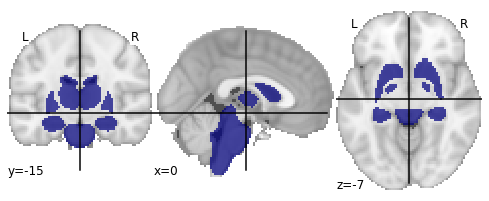

In [17]:
mask_img = "../data/reslicedER_grey25grey25.nii"
plotting.plot_roi(mask_img)

views = ["lateral", "medial", "dorsal", "ventral", "anterior", "posterior"]
big_fsaverage = datasets.fetch_surf_fsaverage('fsaverage')
low_fsaverage = datasets.fetch_surf_fsaverage('fsaverage5')

mask_subc_img = image.resample_to_img("/usr/local/fsl/data/standard/MNI152_T1_1mm_subbr_mask.nii.gz", 
                                      mask_img, interpolation="nearest")
plotting.plot_roi(mask_subc_img)

In [ ]:
from scipy.io import loadmat
td_database = loadmat("../data/TDdatabase.mat", simplify_cells=True)['wholeMaskMNIAll']
regions_to_explore = list(td_database.keys())[19:74]

def get_region_name_from_coord(coords):
    """
    
    Function to extract the region name from 
    a given set of coordinates
    
    """
    coords = list(coords)
    label = "Unknown"
    for reg_label in regions_to_explore:
        reg_coords = td_database[reg_label]
        if coords in reg_coords.tolist():
            label = reg_label
    
    return label

def create_table_from_peaks(cluster_regions, peaks):
    
    """
    Function to create the table of activations
    
    """
    
    hemispheres = []
    region_names = []
    x_coords = []
    y_coords = []
    z_coords = []
    voxels = []
    max_t_stats = []
    
    for ii in np.argsort(peaks)[::-1]:
    
        cluster_img = image.index_img(cluster_regions, ii)

        a,b,c = np.argwhere(cluster_img.get_fdata()==np.max(cluster_img.get_fdata())).flatten()
        coords_cluster = coord_transform(a,b, c, affine=cluster_img.affine)
        
        x_coords.append(coords_cluster[0])
        y_coords.append(coords_cluster[1])
        z_coords.append(coords_cluster[2])
        
        if coords_cluster[0] > 0:
            hemispheres.append("R")
        else:
            hemispheres.append("L")
        
        reg_name = get_region_name_from_coord(coords_cluster)
        region_names.append(reg_name)
        
        n_voxels = (cluster_img.get_fdata()!=0).sum()
        voxels.append(n_voxels)
        
        t_max = cluster_img.get_fdata().max()
        max_t_stats.append(np.round(t_max, 2))
    
    activation_dict = {'Hemisphere': hemispheres, 
                       'Region': region_names,
                       'x': x_coords,
                       'y': y_coords,
                       'z': z_coords,
                       'Voxels': voxels,
                       'Peak (weight)': max_t_stats}
    
    activation_info_df = pd.DataFrame(activation_dict)
    # Convert coordinates to integers
    activation_info_df.x = activation_info_df.x.astype(int)
    activation_info_df.y = activation_info_df.y.astype(int)
    activation_info_df.z = activation_info_df.z.astype(int)
    
    return activation_info_df

In [119]:
positive_regions_0001_img[7].get_fdata().max()

11.238897323608398

# CASE 1: Look Negative vs Look Neutral -> chg_LNeg_LNur 

In [292]:
w_enc_1_img = load_img("../images/LookNeg_LookNeut_diff_ratings_weights_encoding.nii.gz")
w_enc_1_img_thr = load_img("../images/LookNeg_LookNeut_diff_ratings_weights_thr_k50_encoding.nii.gz")

output_dir_1 = Path("../plots/weight_maps/lookNeg_vs_lookNeut/chg_lneg_lneu")
output_dir_1.mkdir(exist_ok=True, parents=True)
output_dir_1 = output_dir_1.absolute().as_posix()

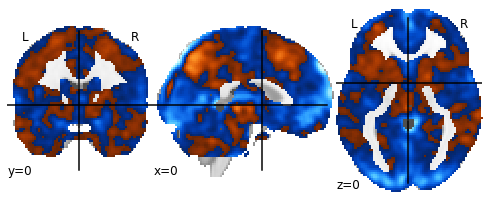

In [273]:
fig = plotting.plot_stat_map(w_enc_1_img,
                             cmap=plotting.cm.cyan_orange,
                             cut_coords=(0,0,0),
                             colorbar=False,
                             annotate=True)
fig.savefig(opj(output_dir_1, "midsagittal_cuts_unthr.png"), dpi=300)
fig.savefig(opj(output_dir_1, "midsagittal_cuts_unthr.pdf"), dpi=300)
fig.savefig(opj(output_dir_1, "midsagittal_cuts_unthr.svg"), dpi=300)

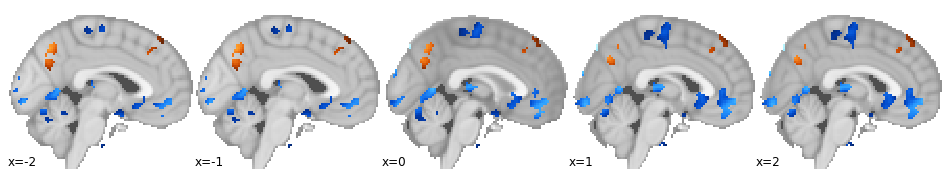

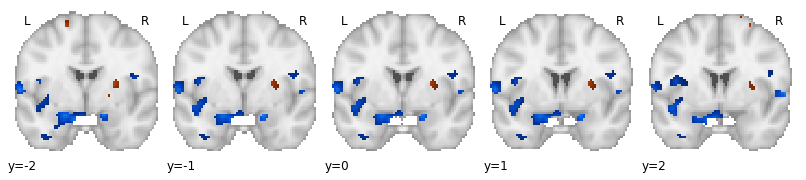

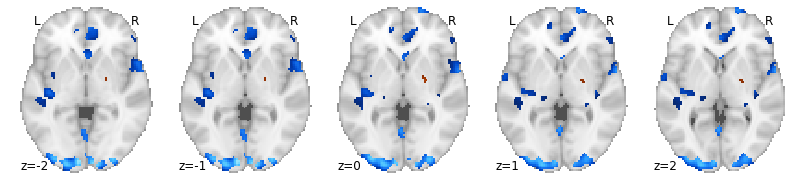

In [299]:
fig = plotting.plot_stat_map(w_enc_1_img_thr,
                       cmap=plotting.cm.cyan_orange,
                       display_mode='x',
                       cut_coords=[-2,-1, 0, 1, 2],
                       colorbar=False,
                       annotate=True)
fig.savefig(opj(output_dir_1, "saggital_cuts_thr_boot1000_k50.png"), dpi=300)
fig.savefig(opj(output_dir_1, "saggital_cuts_thr_boot1000_k50.pdf"), dpi=300)
fig.savefig(opj(output_dir_1, "saggital_cuts_thr_boot1000_k50.svg"), dpi=300)

fig = plotting.plot_stat_map(w_enc_1_img_thr,
                       cmap=plotting.cm.cyan_orange,
                       display_mode='y',
                       cut_coords=[-2,-1, 0, 1, 2],
                       colorbar=False,
                       annotate=True)
fig.savefig(opj(output_dir_1, "coronal_cuts_thr_boot1000_k50.png"), dpi=300)
fig.savefig(opj(output_dir_1, "coronal_cuts_thr_boot1000_k50.pdf"), dpi=300)
fig.savefig(opj(output_dir_1, "coronal_cuts_thr_boot1000_k50.svg"), dpi=300)

fig = plotting.plot_stat_map(w_enc_1_img_thr,
                       cmap=plotting.cm.cyan_orange,
                       display_mode='z',
                       cut_coords=[-2,-1, 0, 1, 2],
                       colorbar=False,
                       annotate=True)
fig.savefig(opj(output_dir_1, "axial_cuts_thr_boot1000_k50.png"), dpi=300)
fig.savefig(opj(output_dir_1, "axial_cuts_thr_boot1000_k50.pdf"), dpi=300)
fig.savefig(opj(output_dir_1, "axial_cuts_thr_boot1000_k50.svg"), dpi=300)

In [274]:
# Save surface plots (pngs, in high resolution)
for hemi in ['left', 'right']:
    if hemi=="left":
        big_texture = surf_plotting.vol_to_surf(w_enc_1_img_thr, big_fsaverage.pial_left, 
                                               interpolation='nearest', radius=0.0, n_samples=1)
        surf_mesh = big_fsaverage.infl_left
        bg_map = big_fsaverage.sulc_left
    else:
        big_texture = surf_plotting.vol_to_surf(w_enc_1_img_thr, big_fsaverage.pial_right,
                                               interpolation='nearest', radius=0.0, n_samples=1)
        surf_mesh = big_fsaverage.infl_right
        bg_map = big_fsaverage.sulc_right
    
    for view in views:
        filename = "stat_surface_" + "hemi_%s" % hemi + "_view_%s" % view + "_boot_k_50.png"
        output_file = output_dir + "/" + filename
        fig = plt.figure(figsize=(10,10))
        plotting.plot_surf_stat_map(surf_mesh,
                                    big_texture, hemi=hemi, colorbar=False, view=view,
                                    cmap=plotting.cm.cyan_orange,
                                    threshold=1e-6, bg_map=bg_map, 
                                    figure=fig, output_file=output_file)

In [228]:
connected_regions_0001_img, index_regions_0001 = connected_regions(w_enc_1_img_thr, 
                                                                   min_region_size=0,
                                                                   smoothing_fwhm=None, 
                                                                   extract_type='connected_components')

# The peaks
positive_regions_0001_img, positive_peaks_0001 = [],[]
negative_regions_0001_img, negative_peaks_0001 = [],[]
for ii in range(len(index_regions_0001)):
    img = image.index_img(connected_regions_0001_img, ii)
    data = img.get_fdata()
    vmin = np.min(data)
    vmax = np.max(data)
    
    if abs(vmax) >  abs(vmin):
        positive_regions_0001_img.append(img)
        positive_peaks_0001.append(vmax)
    else:
        negative_regions_0001_img.append(image.math_img("-1*img1", img1=img))
        negative_peaks_0001.append(abs(vmin))
        
positive_regions_0001_img = image.concat_imgs(positive_regions_0001_img)
negative_regions_0001_img = image.concat_imgs(negative_regions_0001_img)

In [229]:
print(negative_regions_0001_img.shape[3] + positive_regions_0001_img.shape[3])
print(len(positive_peaks_0001) + len(negative_peaks_0001))

52
52


In [235]:
pos_info_0001_df = create_table_from_peaks(positive_regions_0001_img, positive_peaks_0001)
pos_info_0001_df.to_excel("../results/prediction/chg_LNeg_LNur/look_neg_look_neut/positive_clusters_k50.xlsx",
                         index=False)
pos_info_0001_df

,Hemisphere,Region,x,y,z,Voxels,Peak (weight)
0,R,Inferior_Parietal_Lobule,38,-56,58,56,6.02
1,L,Precuneus,-2,-66,46,190,5.86
2,L,Inferior_Parietal_Lobule,-40,-50,50,131,5.74
3,L,Superior_Frontal_Gyrus,-20,62,-8,126,4.51
4,R,Middle_Frontal_Gyrus,44,16,52,54,3.74
5,R,Inferior_Parietal_Lobule,44,-48,48,73,3.62
6,L,Superior_Parietal_Lobule,-30,-68,46,100,3.61
7,L,Supramarginal_Gyrus,-46,-50,38,75,3.52
8,R,Middle_Frontal_Gyrus,24,8,64,52,3.50
9,L,Medial_Frontal_Gyrus,-4,30,40,158,3.48


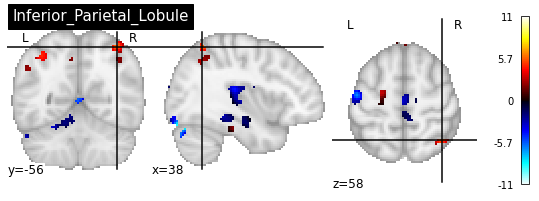

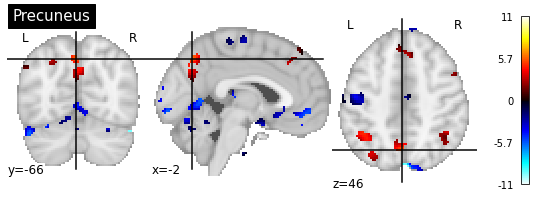

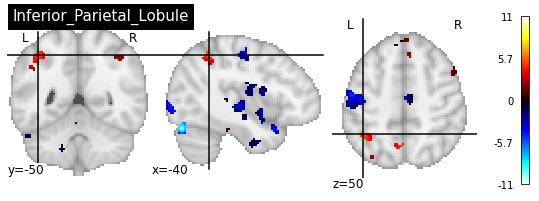

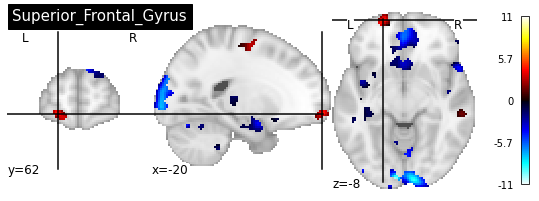

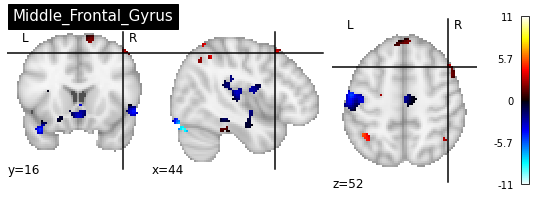

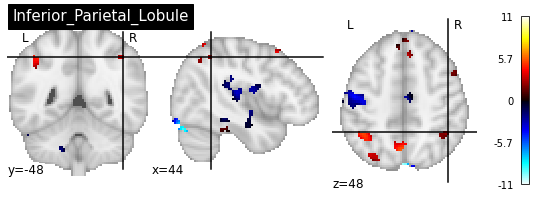

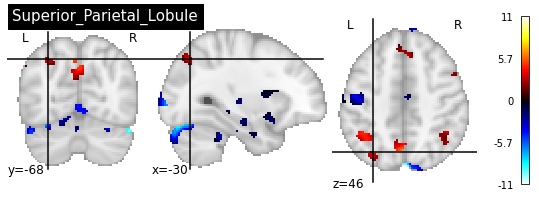

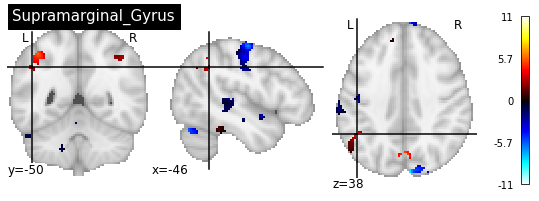

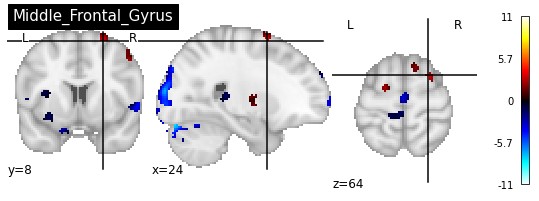

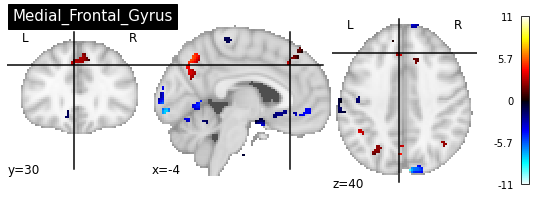

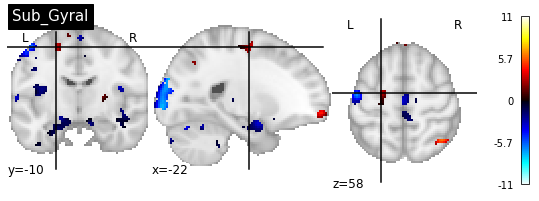

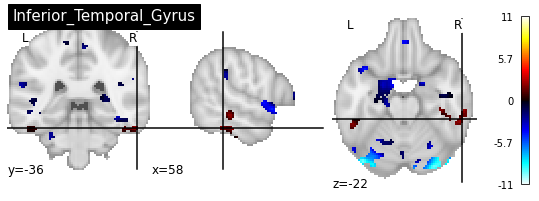

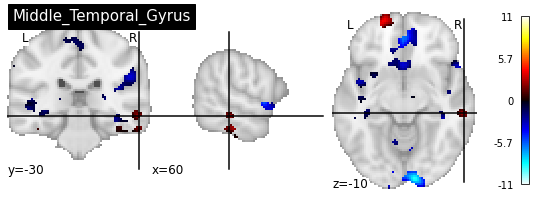

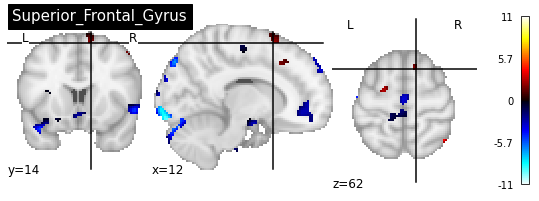

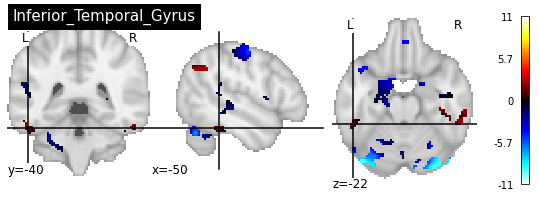

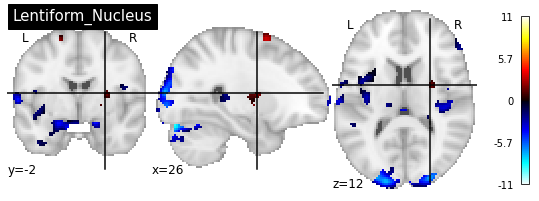

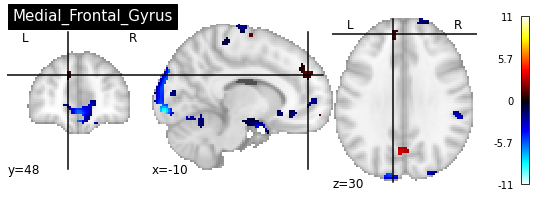

In [232]:
for ii in range(pos_info_0001_df.shape[0]):
    coords = pos_info_0001_df.loc[ii, ['x','y','z'] ].to_numpy()
    reg = pos_info_0001_df.loc[ii, "Region" ]
    plotting.plot_stat_map(w_enc_1_img_thr, cut_coords=coords, title=reg)

In [236]:
neg_info_0001_df = create_table_from_peaks(negative_regions_0001_img, negative_peaks_0001)
neg_info_0001_df.iloc[:, 6] = -neg_info_0001_df.iloc[:, 6] # Display peaks in negative
neg_info_0001_df.to_excel("../results/prediction/chg_LNeg_LNur/look_neg_look_neut/negative_clusters_k50.xlsx",
                         index=False)
neg_info_0001_df

,Hemisphere,Region,x,y,z,Voxels,Peak (weight)
0,R,Unknown,4,-84,42,118,-11.32
1,L,Lingual_Gyrus,-8,-94,-6,2041,-10.88
2,L,Declive,-40,-78,-24,646,-10.10
3,R,Declive,52,-66,-26,507,-9.79
4,R,Cuneus,4,-94,22,52,-7.41
5,L,Unknown,0,-58,6,136,-6.65
6,L,Precentral_Gyrus,-46,-12,58,398,-6.41
7,R,Unknown,2,52,-6,555,-6.33
8,R,Extra_Nuclear,2,-26,8,54,-6.00
9,R,Unknown,6,60,36,99,-5.84


/home/javi/Documentos/software/nilearn/nilearn/plotting/displays.py:666: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  figure = plt.figure(figure, figsize=figsize,


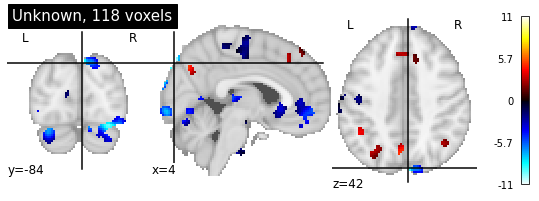

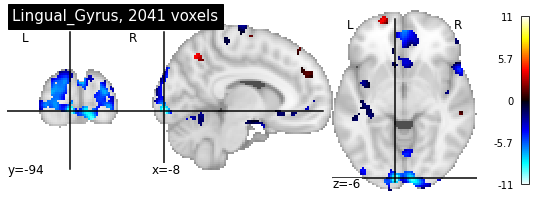

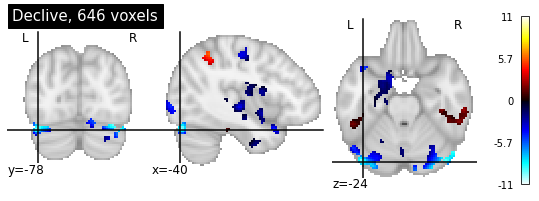

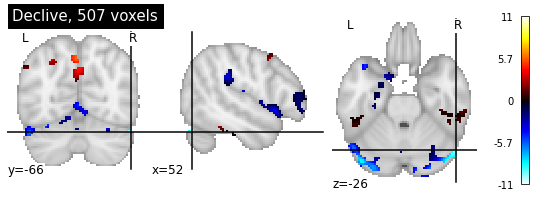

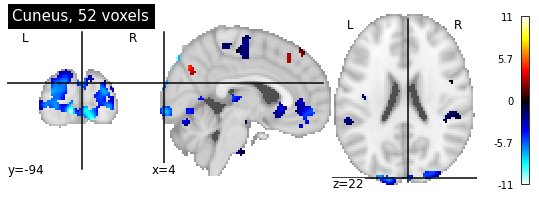

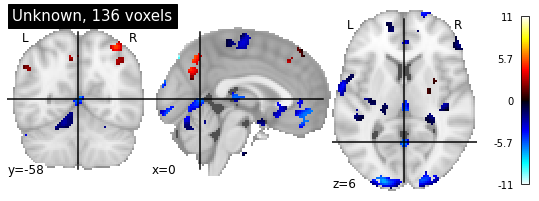

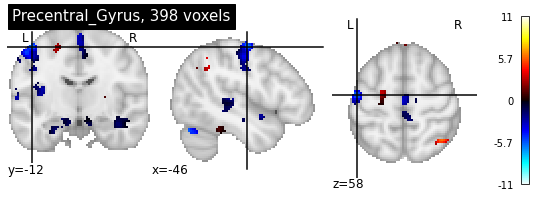

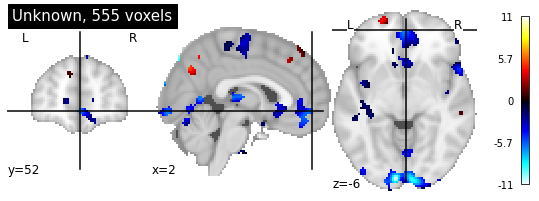

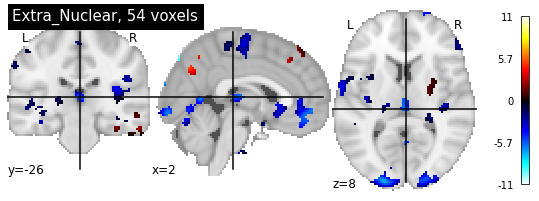

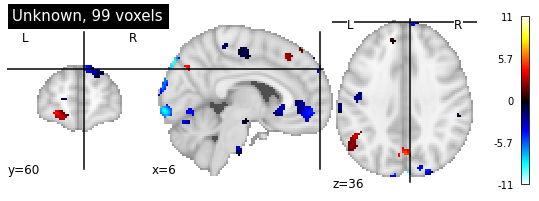

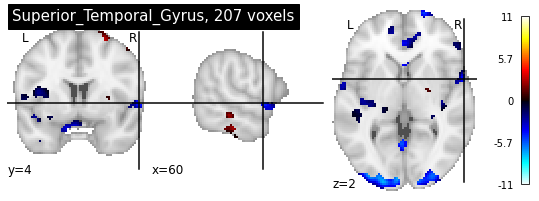

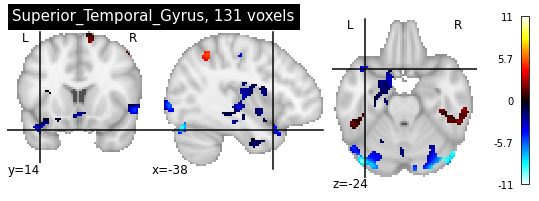

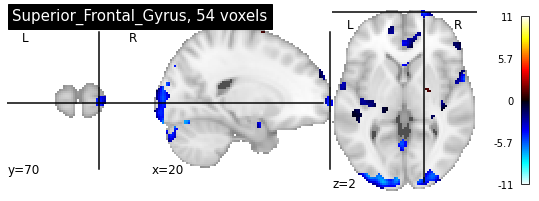

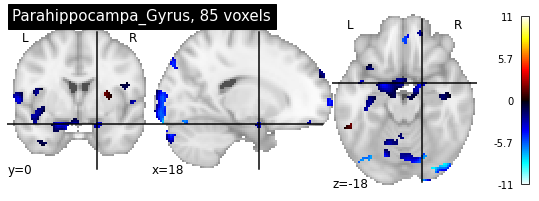

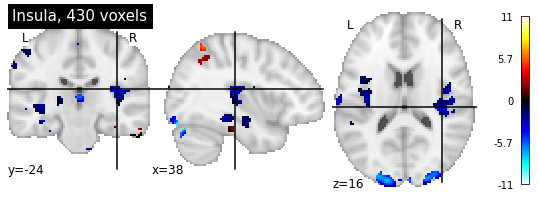

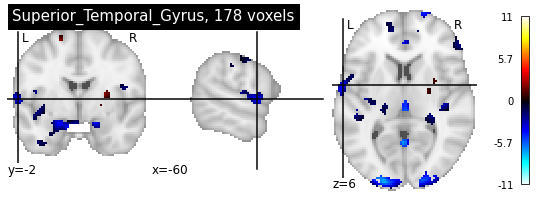

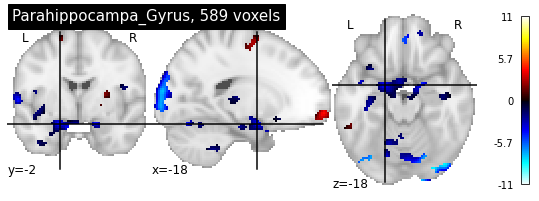

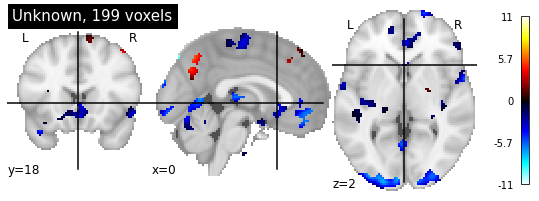

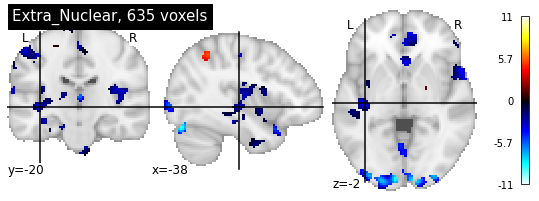

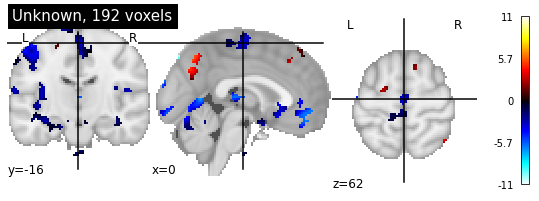

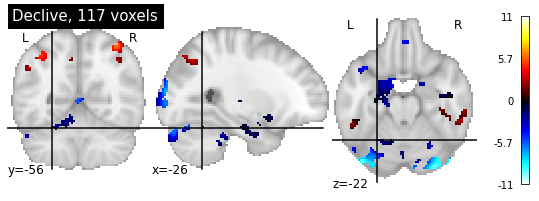

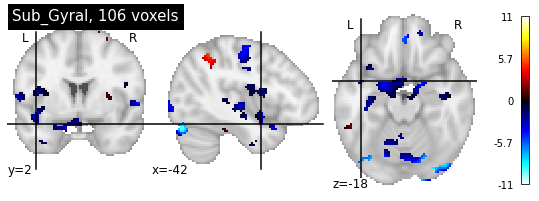

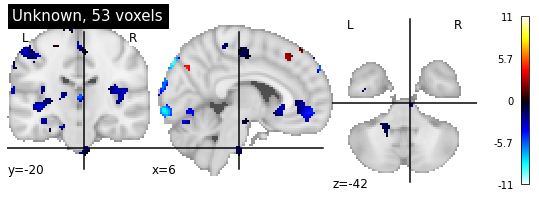

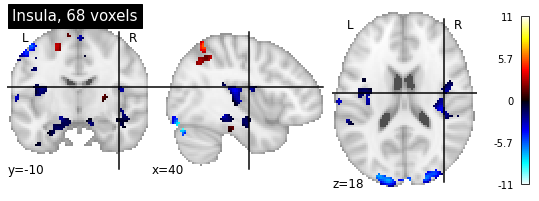

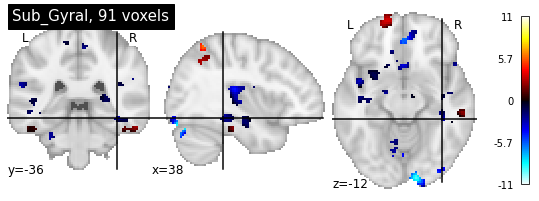

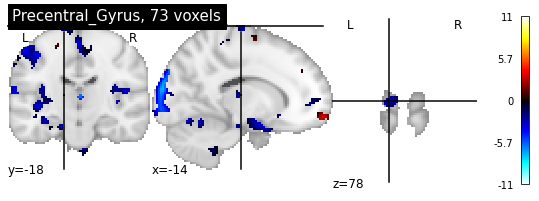

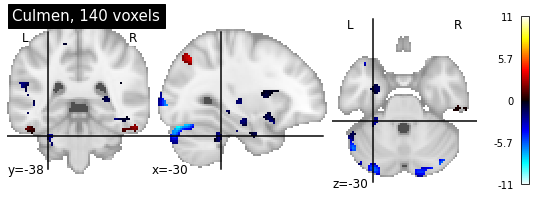

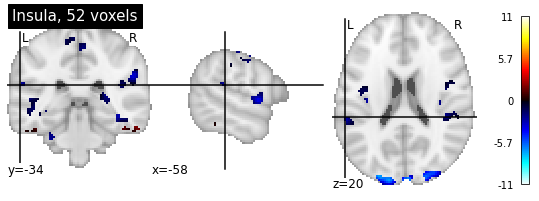

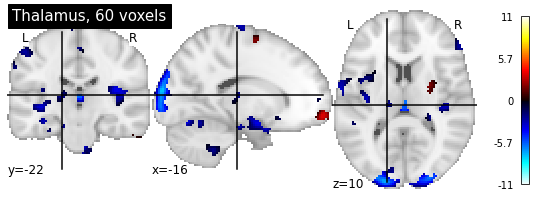

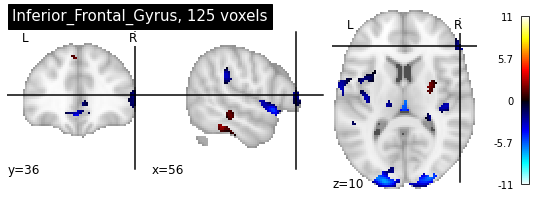

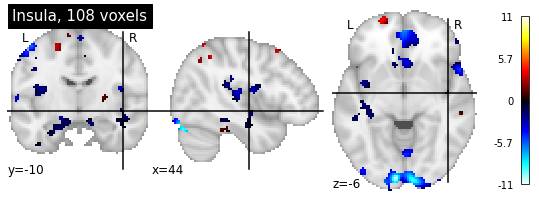

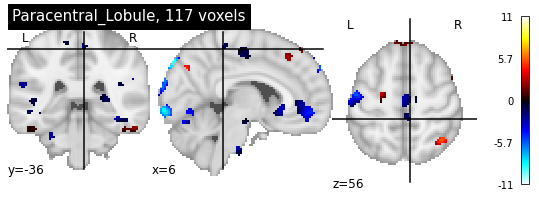

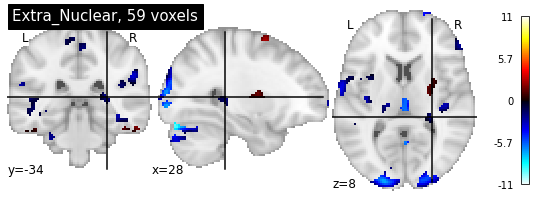

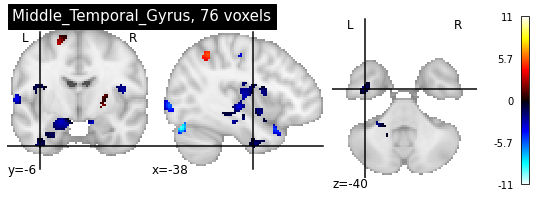

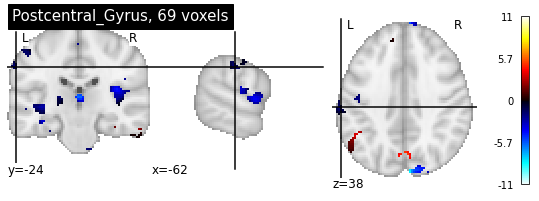

In [243]:
for ii in range(neg_info_0001_df.shape[0]):
    coords = neg_info_0001_df.loc[ii, ['x','y','z'] ].to_numpy()
    reg = neg_info_0001_df.loc[ii, "Region"]
    n_voxels = neg_info_0001_df.loc[ii, "Voxels"]
    plotting.plot_stat_map(w_enc_1_img_thr, cut_coords=coords, title="%s, %d voxels"%(reg, n_voxels))

In [238]:
# check that we have the same number of voxels of the orignal image
print(np.sum(abs(w_enc_1_img_thr.get_fdata())>0))
print(pos_info_0001_df.Voxels.sum()  + neg_info_0001_df.Voxels.sum())

10244
10244


# REGULATE NEGATIVE vs LOOK NEGATIVE

In [294]:
w_enc_2_img = load_img("../images/RegNeg_LookNeg_diff_ratings_weights_encoding.nii.gz")
w_enc_2_img_thr = load_img("../images/RegNeg_LookNeg_diff_ratings_weights_thr_k50_encoding.nii.gz")

output_dir_2 = Path("../plots/weight_maps/regNeg_vs_lookNeg/chg_rneg_lneg")
output_dir_2.mkdir(exist_ok=True, parents=True)
output_dir_2 = output_dir_2.absolute().as_posix()

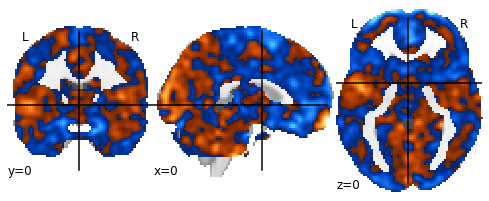

In [278]:
fig = plotting.plot_stat_map(w_enc_2_img,
                             cmap=plotting.cm.cyan_orange,
                             cut_coords=(0,0,0),
                             colorbar=False,
                             annotate=True)
fig.savefig(opj(output_dir_2, "midsagittal_cuts_unthr.png"), dpi=300)
fig.savefig(opj(output_dir_2, "midsagittal_cuts_unthr.pdf"), dpi=300)
fig.savefig(opj(output_dir_2, "midsagittal_cuts_unthr.svg"), dpi=300)

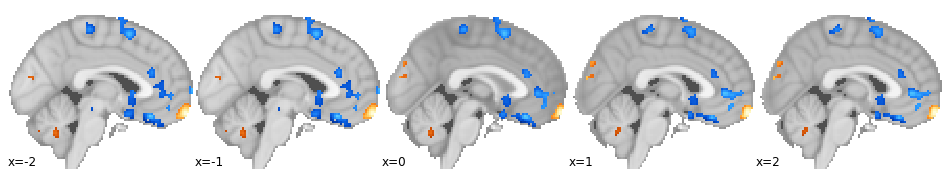

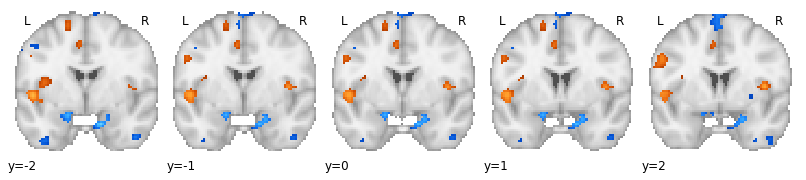

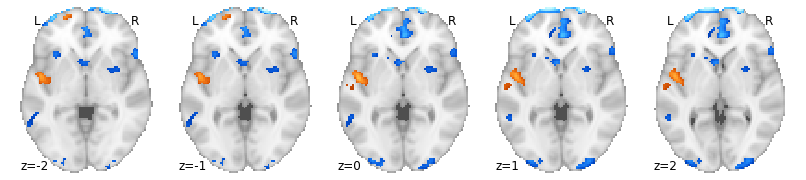

In [297]:
fig = plotting.plot_stat_map(w_enc_2_img_thr,
                       cmap=plotting.cm.cyan_orange,
                       display_mode='x',
                       cut_coords=[-2,-1, 0, 1, 2],
                       colorbar=False,
                       annotate=True)
fig.savefig(opj(output_dir_2, "saggital_cuts_thr_boot1000_k50.png"), dpi=300)
fig.savefig(opj(output_dir_2, "saggital_cuts_thr_boot1000_k50.pdf"), dpi=300)
fig.savefig(opj(output_dir_2, "saggital_cuts_thr_boot1000_k50.svg"), dpi=300)

fig = plotting.plot_stat_map(w_enc_2_img_thr,
                       cmap=plotting.cm.cyan_orange,
                       display_mode='y',
                       cut_coords=[-2,-1, 0, 1, 2],
                       colorbar=False,
                       annotate=True)
fig.savefig(opj(output_dir_2, "coronal_cuts_thr_boot1000_k50.png"), dpi=300)
fig.savefig(opj(output_dir_2, "coronal_cuts_thr_boot1000_k50.pdf"), dpi=300)
fig.savefig(opj(output_dir_2, "coronal_cuts_thr_boot1000_k50.svg"), dpi=300)

fig = plotting.plot_stat_map(w_enc_2_img_thr,
                       cmap=plotting.cm.cyan_orange,
                       display_mode='z',
                       cut_coords=[-2,-1, 0, 1, 2],
                       colorbar=False,
                       annotate=True)
fig.savefig(opj(output_dir_2, "axial_cuts_thr_boot1000_k50.png"), dpi=300)
fig.savefig(opj(output_dir_2, "axial_cuts_thr_boot1000_k50.pdf"), dpi=300)
fig.savefig(opj(output_dir_2, "axial_cuts_thr_boot1000_k50.svg"), dpi=300)

In [279]:
# Save surface plots (pngs, in high resolution)
for hemi in ['left', 'right']:
    if hemi=="left":
        big_texture = surf_plotting.vol_to_surf(w_enc_2_img_thr, big_fsaverage.pial_left,
                                               interpolation='nearest', radius=0., n_samples=1)
        surf_mesh = big_fsaverage.infl_left
        bg_map = big_fsaverage.sulc_left
    else:
        big_texture = surf_plotting.vol_to_surf(w_enc_2_img_thr, big_fsaverage.pial_right,
                                               interpolation='nearest', radius=0., n_samples=1)
        surf_mesh = big_fsaverage.infl_right
        bg_map = big_fsaverage.sulc_right
    
    for view in views:
        filename = "stat_surface_" + "hemi_%s" % hemi + "_view_%s" % view + "_boot_k_50.png"
        output_file = output_dir_2 + "/" + filename
        fig = plt.figure(figsize=(10,10))
        plotting.plot_surf_stat_map(surf_mesh,
                                    big_texture, hemi=hemi, colorbar=False, view=view,
                                    cmap=plotting.cm.cyan_orange,
                                    threshold=1e-6, bg_map=bg_map, 
                                    figure=fig, output_file=output_file)

In [239]:
connected_regions_0002_img, index_regions_0002 = connected_regions(w_enc_2_img_thr,
                                                                   min_region_size=0,
                                                                   smoothing_fwhm=None, 
                                                                   extract_type='connected_components')

# The peaks
positive_regions_0002_img, positive_peaks_0002 = [],[]
negative_regions_0002_img, negative_peaks_0002 = [],[]
for ii in range(len(index_regions_0002)):
    img = image.index_img(connected_regions_0002_img, ii)
    data = img.get_fdata()
    vmin = np.min(data)
    vmax = np.max(data)
    
    if abs(vmax) >  abs(vmin):
        positive_regions_0002_img.append(img)
        positive_peaks_0002.append(vmax)
    else:
        negative_regions_0002_img.append(image.math_img("-1*img1", img1=img))
        negative_peaks_0002.append(abs(vmin))
        
positive_regions_0002_img = image.concat_imgs(positive_regions_0002_img)
negative_regions_0002_img = image.concat_imgs(negative_regions_0002_img)

In [240]:
print(negative_regions_0002_img.shape[3] + positive_regions_0002_img.shape[3])
print(len(positive_peaks_0002) + len(negative_peaks_0002))

54
54


In [246]:
pos_info_0002_df = create_table_from_peaks(positive_regions_0002_img, positive_peaks_0002)
pos_info_0002_df.to_excel("../results/prediction/chg_RNeg_LNeg/reg_neg_look_neg/positive_clusters_k50.xlsx",
                         index=False)
pos_info_0002_df

,Hemisphere,Region,x,y,z,Voxels,Peak (weight)
0,R,Medial_Frontal_Gyrus,4,64,-18,435,18.64
1,L,Postcentral_Gyrus,-42,-22,60,989,15.32
2,L,Lingual_Gyrus,-14,-92,-20,110,13.08
3,R,Cuneus,2,-90,18,128,11.62
4,L,Precuneus,-10,-78,46,53,11.27
5,L,Superior_Temporal_Gyrus,-62,-16,8,239,11.24
6,L,Superior_Temporal_Gyrus,-48,-4,0,383,11.16
7,R,Transverse_Temporal_Gyrus,56,-14,12,288,10.32
8,R,Insula,42,2,8,54,10.17
9,R,Middle_Frontal_Gyrus,44,46,14,111,9.93


In [242]:
neg_info_0002_df = create_table_from_peaks(negative_regions_0002_img, negative_peaks_0002)
neg_info_0002_df.iloc[:, 6] = -neg_info_0002_df.iloc[:, 6] # Display peaks in negative
neg_info_0002_df.to_excel("../results/prediction/chg_RNeg_LNeg/reg_neg_look_neg/negative_clusters_k50.xlsx",
                         index=False)
neg_info_0002_df

,Hemisphere,Region,x,y,z,Voxels,Peak (weight)
0,R,Unknown,22,70,-2,181,-17.97
1,L,Unknown,-10,72,4,348,-17.51
2,R,Unknown,36,62,-12,106,-14.07
3,L,Unknown,-16,-20,-22,113,-12.80
4,R,Uncus,14,-2,-26,131,-12.42
5,L,Medial_Frontal_Gyrus,-2,30,-20,999,-12.09
6,L,Unknown,0,10,60,298,-11.58
7,L,Parahippocampa_Gyrus,-16,-2,-18,75,-10.56
8,L,Declive,-42,-76,-26,117,-10.54
9,R,Declive,44,-70,-26,54,-10.52


In [244]:
print(np.sum(abs(w_enc_2_img_thr.get_fdata())>0))
print(pos_info_0002_df.Voxels.sum()  + neg_info_0002_df.Voxels.sum())

9865
9865
